In [8]:
using Revise

In [9]:
using QuantumStates
using LinearAlgebra
using Plots

In [10]:
const c = 299792458
const h = 6.626e-34
const ħ = h / 2π
;

### Construct CaOH ${}^2\Sigma^+$ states  in $|F, m\rangle$ basis

In [1]:
QN_bounds = (E = 0.0, S = 1/2, I = 1/2, Λ = 0, N = (1,2))
basis = enumerate_states(HundsCaseB_Rot, QN_bounds);

LoadError: UndefVarError: enumerate_states not defined

In [18]:
states = states_from_basis(basis)
;

LoadError: MethodError: no method matching State(::Vector{HundsCaseB_Rot}, ::Vector{ComplexF64})
[0mClosest candidates are:
[0m  State(::Any, ::Any, [91m::Any[39m) at X:\My Drive\github\QuantumStates\src\States.jl:12

In [13]:
const gS = 2.0023
const e = 1.60217662e-19
const me = 9.10938356e-31
const μB = (e * ħ / (2me)) * (1 / h) * 1e-4 * 1e-6 # 1e-4 = Tesla to Gauss, 1e-6 = Hz to MHz
;

In [14]:
# Spectroscopic constants
# From Scurlock et al.
# const BX = @with_unit 10023.0841 "MHz"
# const DX = @with_unit 1.154e-2 "MHz"
# const γX = @with_unit 34.7593 "MHz"
# const bFX = @with_unit 2.602 "MHz"
# const cX = @with_unit 2.053 "MHz"
const BX = 10023.0841
const DX = 1.154e-2 
const γX = 34.7593 
const bFX = 2.602 
const cX = 2.053 
const μX = 1e-6 * 1.465 * 10^2 * (1e-21 / c) / h # 1e-6 = Hz to MHz
;

In [15]:
# Define the zero-field Hamiltonian operator
H_operator = 
    BX * Rotation + 
    DX * RotationDistortion + 
    γX * SpinRotation + 
    bFX * Hyperfine_IS + 
    (cX/3) * Hyperfine_Dipolar
;

  6.775290 seconds (46.41 M allocations: 1.811 GiB, 13.02% gc time, 56.25% compilation time)


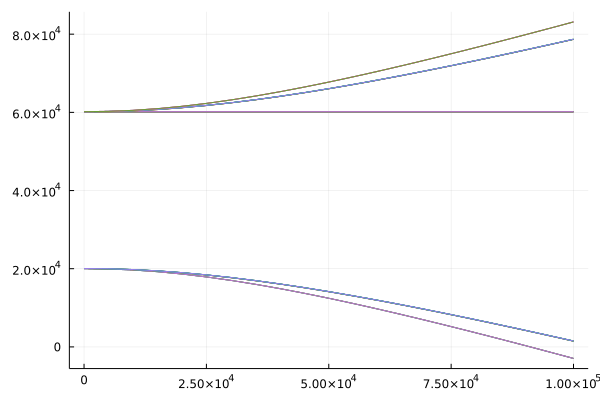

In [16]:
# Add the Stark operator to the zero-field Hamiltonian operator 
HStark(E) = H_operator + μX * E * Stark
H = Hamiltonian(basis=basis, H_operator=HStark);

Es = 0:5000:100000
eigenstates = zeros(length(Es), length(H.basis), length(H.basis))
energies = zeros(length(Es), length(H.basis))
@time begin
    for (i, E) in enumerate(Es)
        es, vs = solve(H, E=E)
        eigenstates[i, :, :] = vs
        energies[i, :] = es
    end
end
plot(Es, energies, legend=nothing)

  2.362523 seconds (18.51 M allocations: 651.190 MiB, 16.20% gc time, 2.03% compilation time)


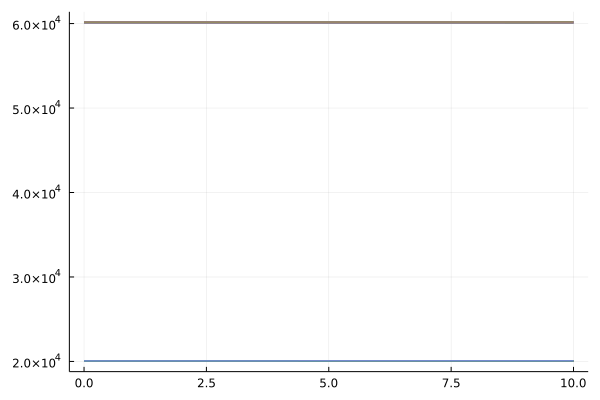

In [219]:
# Add the Zeeman operator to the zero-field Hamiltonian operator 
HZeeman(B) = H_operator + gS * μB * B * Zeeman
# HZeeman(B) = gS * μB * B * Zeeman
H = Hamiltonian(basis=basis, H_operator=HZeeman);

Bs = 0:1:10
eigenstates = zeros(length(Bs), length(H.basis), length(H.basis))
energies = zeros(length(Bs), length(H.basis))
@time begin
    for (i, B) in enumerate(Bs)
        es, vs = solve(H, B=B)
        eigenstates[i, :, :] = vs
        energies[i, :] = es
    end
end
plot(Bs, energies, legend=nothing)

### Construct CaOH ${}^2\Pi_{1/2}$ states  in $|F, m\rangle$ basis

In [4]:
# Enumerate all states of Λ = -1 in a Hund's case (a) basis
QN_bounds = (S = 1/2, I = 1/2, Λ = -1, J = (1/2, 3/2))
basis_Λm1 = enumerate_states(HundsCaseA_Rot, QN_bounds)
;

In [5]:
# Enumerate all states of Λ = +1 in a Hund's case (a) basis
QN_bounds = (S = 1/2, I = 1/2, Λ = +1, J = (1/2, 3/2))
basis_Λp1 = enumerate_states(HundsCaseA_Rot, QN_bounds)
;

In [6]:
basis = [basis_Λm1; basis_Λp1]
states = states_from_basis(basis)
;

LoadError: MethodError: no method matching State(::Vector{HundsCaseA_Rot}, ::Vector{ComplexF64})
[0mClosest candidates are:
[0m  State(::Any, ::Any, [91m::Any[39m) at X:\My Drive\github\QuantumStates\src\States.jl:12

In [223]:
# Spectroscopic constants for the A state
# From Li & Coxon (1995)
const BA = 0.3412200 * c * 1e2
const AA = 66.8181 * c * 1e2
const pA = -0.04287 * c * 1e2
const qA = -0.3257e-3 * c * 1e2
const aA = 1.0 * 1e4
const bFA = 1.0 * 1e4
const cA = 1.0 * 1e4
const dA = 1.0 * 1e4
;

In [224]:
# Define the zero-field Hamiltonian operator
H_caseA_operator = 
    BA * Rotation +
    AA * SpinOrbit + 
    BA * SpinUncoupling + 
    qA * ΛDoubling_q +
    (pA + 2qA) * ΛDoubling_p2q +
    aA * Hyperfine_IL +
    bFA * Hyperfine_IF +
    cA * Hyperfine_Dipolar_c +
    dA * Hyperfine_Dipolar_d
;

In [225]:
H_caseA = Hamiltonian(basis=basis, H_operator=H_caseA_operator);

In [226]:
es, vs = solve(H_caseA);

In [227]:
coeffs = vs[1,:,1]
x = State(basis, coeffs)

State(BasisState[HundsCaseA_Rot(0.0, 1//2, 1//2, -1//2, -1//1, 3//2, -3//2, 1//1, -1//1, (Σ = -0.5:1.0:0.5, Ω = -1.5:1.0:-1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseA_Rot(0.0, 1//2, 1//2, -1//2, -1//1, 3//2, -3//2, 1//1, 0//1, (Σ = -0.5:1.0:0.5, Ω = -1.5:1.0:-1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseA_Rot(0.0, 1//2, 1//2, -1//2, -1//1, 3//2, -3//2, 1//1, 1//1, (Σ = -0.5:1.0:0.5, Ω = -1.5:1.0:-1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseA_Rot(0.0, 1//2, 1//2, -1//2, -1//1, 3//2, -3//2, 2//1, -2//1, (Σ = -0.5:1.0:0.5, Ω = -1.5:1.0:-1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseA_Rot(0.0, 1//2, 1//2, -1//2, -1//1, 3//2, -3//2, 2//1, -1//1, (Σ = -0.5:1.0:0.5, Ω = -1.5:1.0:-1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseA_Rot(0.0, 1//2, 1//2, -1//2, -1//1, 3//2, -3//2, 2//1, 0//1, (Σ = -0.5:1.0:0.5, Ω = -1.5:1.0:-1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseA_Rot(0.0, 1//2, 1//2, -1//2, -1//1, 3//2, -3//2, 2//1, 1//1, (Σ = -0.5:1.0:0.5, Ω = -1.5:1.0:-

### Construct the $X{}^2\Sigma^+(01^10)$ states in a Hund's case (b) basis

In [298]:
# Spectroscopic constants for X(010)
# From Table III, Li and Coxon (1995)
# Units are MHz
const Tv = 352.9259 * c * 1e-4 # the fundamental bending frequency
const Bv = 0.333458 * c * 1e-4
const Dv = 0.3930e-6 * c * 1e-4
const γv = 0.001184 * c * 1e-4
const qv = -0.7181e-3 * c * 1e-4
const bFX = 2.602
const cX = 2.053
;

In [299]:
QN_bounds = (S = 1/2, I = 1/2, Λ = +1, N = 1:2)
basis_p = enumerate_states(HundsCaseB_Rot, QN_bounds)
;

In [300]:
QN_bounds = (S = 1/2, I = 1/2, Λ = -1, N = 1:2)
basis_m = enumerate_states(HundsCaseB_Rot, QN_bounds)
;

In [301]:
# We order the basis according to increasing M_F quantum number, which ensures
# that M_F is a good quantum number for the zero-field eigenstates
X010_basis = order([basis_m; basis_p], :M)
;

In [302]:
# Define the zero-field Hamiltonian operator
H_operator = 
    Bv * Rotation + 
    Dv * RotationDistortion + 
    γv * SpinRotation +
    bFX * Hyperfine_IS + 
    (cX/3) * Hyperfine_Dipolar +
    qv * ℓDoubling
;

In [303]:
H_X010_bare = Hamiltonian(basis=X010_basis, H_operator=H_operator)
H_Stark     = Hamiltonian(basis=X010_basis, H_operator=Stark)
H_Zeeman    = Hamiltonian(basis=X010_basis, H_operator=Zeeman)
update_matrix!(H_X010_bare)
update_matrix!(H_Stark)
update_matrix!(H_Zeeman)

H = zeros(ComplexF64, length(X010_basis), length(X010_basis))
;

In [304]:
# Define function to easily update the full Hamiltonian, saving the full Hamiltonian in H (by overwriting)
function H_X010_Field!(H, H0, H_Stark, H_Zeeman, B, E)
    @. H = H0 + μX * E * H_Stark + gS * μB * B * H_Zeeman
    return nothing
end;

  1.364753 seconds (380.21 k allocations: 306.661 MiB, 2.42% gc time, 4.93% compilation time)


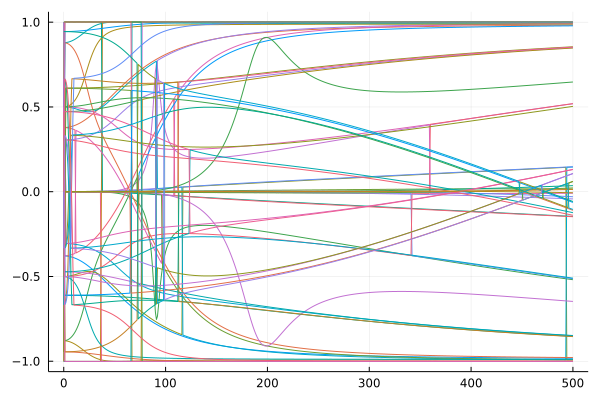

In [305]:
B = 0.0
Es = 0:1:500
eigenstates      = zeros(length(Es), length(X010_basis), length(X010_basis))
energies         = zeros(length(Es), length(X010_basis))
magnetic_moments = zeros(length(Es), length(X010_basis))

@time begin
    for (i, E) in enumerate(Es)
        H_X010_Field!(H, H_X010_bare.M, H_Stark.M, H_Zeeman.M, B, E)
        es, vs = eigen(H)
        es, vs = real.(es), real.(vs)
        
        ΔB = 1e-6
        H_X010_Field!(H, H_X010_bare.M, H_Stark.M, H_Zeeman.M, B + ΔB, E)
        es′, vs′ = eigen(H)
        es′, vs′ = real.(es′), real.(vs′)

        eigenstates[i, :, :] = vs
        energies[i, :] = es
        magnetic_moments[i, :] = (es′ .- es) / (μB * ΔB)
    end
end
plot(Es, magnetic_moments, legend=nothing)

  0.187549 seconds (332.38 k allocations: 45.276 MiB, 3.65% gc time, 38.97% compilation time)


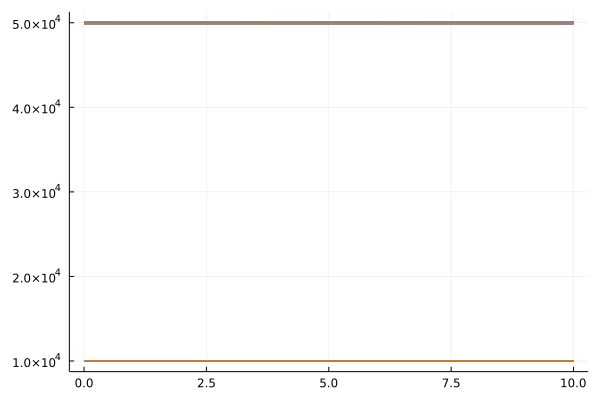

In [306]:
E = 0.0
Bs = 0:0.1:10
eigenstates = zeros(length(Bs), length(X010_basis), length(X010_basis))
energies    = zeros(length(Bs), length(X010_basis))

@time begin
    for (i, B) in enumerate(Bs)
        H_X010_Field!(H, H_X010_bare.M, H_Stark.M, H_Zeeman.M, B, E)
        es, vs = eigen(H)
        eigenstates[i, :, :] = real.(vs)
        energies[i, :] = real.(es)
    end
end
plot(Bs, energies, legend=nothing)

### Transition frequencies and strengths

In [516]:
E = 0.0
B = 0.001
H_X010_Field!(H, H_X010_bare.M, H_Stark.M, H_Zeeman.M, B, E)
es, vs = eigen(H)
;

In [517]:
i = 24; j = 45

coeffs = vs[:,i]
state = State(X010_basis, coeffs) 
state |> display

coeffs = vs[:,j]
state′ = State(X010_basis, coeffs)
state′ |> display

es[j] - es[i] |> display
TDM(state, state′, 0) |> display

State(BasisState[HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5,

State(BasisState[HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5,

39975.75854220904 + 0.0im

0.1708067392653096 + 0.0im

In [518]:
i = 23; j = 46

coeffs = vs[:,i]
state = State(X010_basis, coeffs) 
state |> display

coeffs = vs[:,j]
state′ = State(X010_basis, coeffs) 
state′ |> display

es[j] - es[i] |> display
TDM(state, state′, 0) |> display

State(BasisState[HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5,

State(BasisState[HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5,

39975.75967016157 + 0.0im

0.08543064633918798 + 0.0im

In [519]:
i = 23; j = 50

coeffs = vs[:,i]
state = State(X010_basis, coeffs) 
state |> display

coeffs = vs[:,j]
state′ = State(X010_basis, coeffs) 
state′ |> display

es[j] - es[i] |> display
TDM(state, state′, 0) |> display

State(BasisState[HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5,

State(BasisState[HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 5//2, 3//1, -3//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, -1//1, 2//1, 5//2, 3//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5, F = 2.0:1.0:3.0, M = -3.0:1.0:3.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 1//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_Rot(0.0, 1//2, 1//2, 1//1, 2//1, 3//2, 2//1, -2//1, (N = 1:∞, J = 1.5:1.0:2.5,

39977.092882328245 + 0.0im

0.04999415997724257 + 0.0im